# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 5 - Semester 7

## Zahwa Genoveva / 51421554
## 4IA12

<center>
    <img src="https://d3h7nocoh5wnls.cloudfront.net/65f863d2b8a8f574defc2e78_8_Keoqt2_A7i_E_Bc_B_Mk_S_Gceu_JSZ_Zm_Ai70pb_Z_Kpz_C_Jyfq_Q8_df7c4145ad.webp"  width="2000" heigh="1000" />
</center>

# Data Understanding

### Melihat struktur data

In [1]:
import numpy as np  # Untuk operasi aljabar linear
import pandas as pd  # Untuk pemrosesan dan manipulasi data

# Menampilkan file yang ada di direktori input
import os  # Untuk interaksi dengan sistem file
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  # Mencetak jalur lengkap file

In [4]:
# Memperbarui pip ke versi terbaru
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np  # Untuk operasi aljabar linear
import pandas as pd  # Untuk pemrosesan dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data

# Menginstal versi tertentu dari Seaborn untuk visualisasi
!pip install seaborn==0.11.0
import seaborn as sns  # Untuk visualisasi data yang lebih menarik

# Mengimpor kelas untuk pengolahan data
from sklearn.preprocessing import LabelEncoder  # Untuk encoding label kategori
from sklearn.preprocessing import OneHotEncoder  # Untuk one-hot encoding fitur kategori
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi set pelatihan dan pengujian
from sklearn.metrics import accuracy_score  # Untuk menghitung akurasi model

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame
df = pd.read_csv("mushrooms.csv")

# Menampilkan lima baris pertama dari DataFrame untuk melihat struktur dan data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Mengecek outlier, null value, dan duplicate

In [7]:
# Menghitung jumlah nilai yang hilang (null) di setiap kolom DataFrame
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# Menampilkan dimensi (jumlah baris dan kolom) dari DataFrame
df.shape

(8124, 23)

In [9]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
# Menghitung jumlah kemunculan setiap kategori dalam kolom 'class'
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

### Visualisasi Data

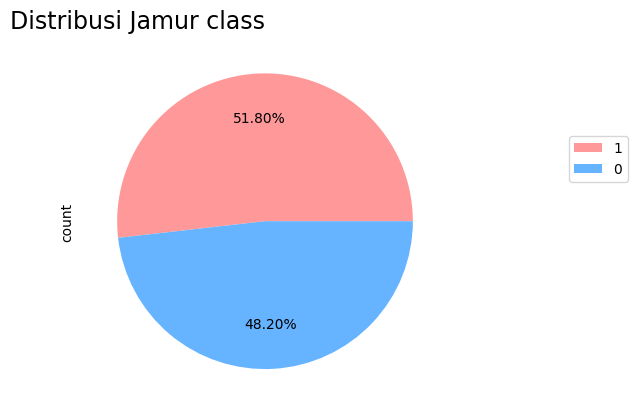

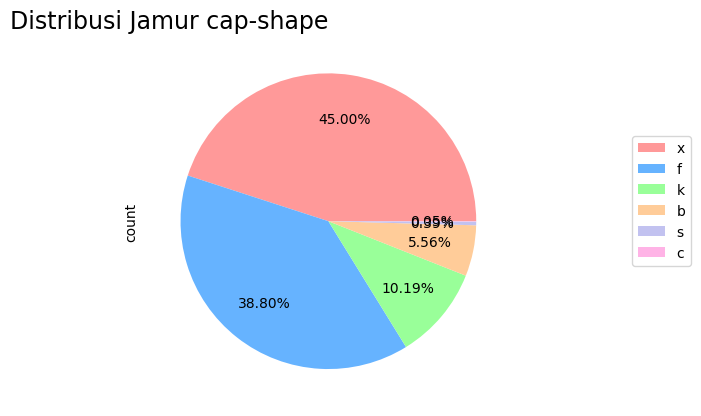

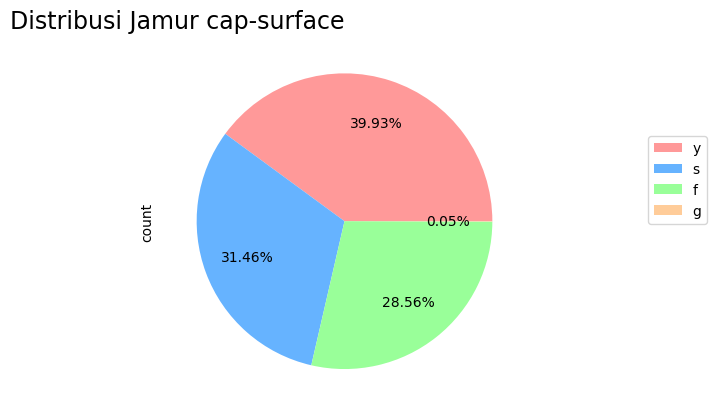

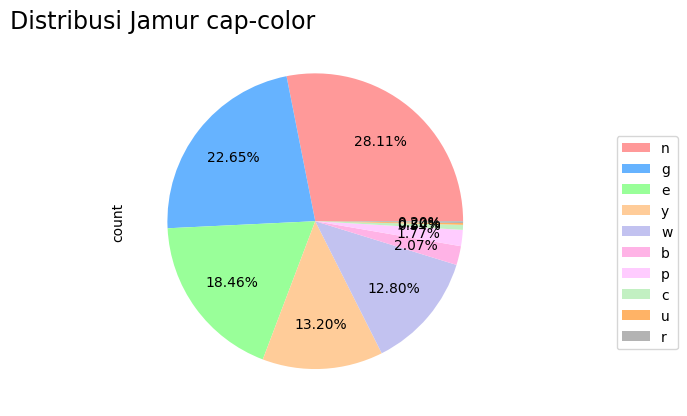

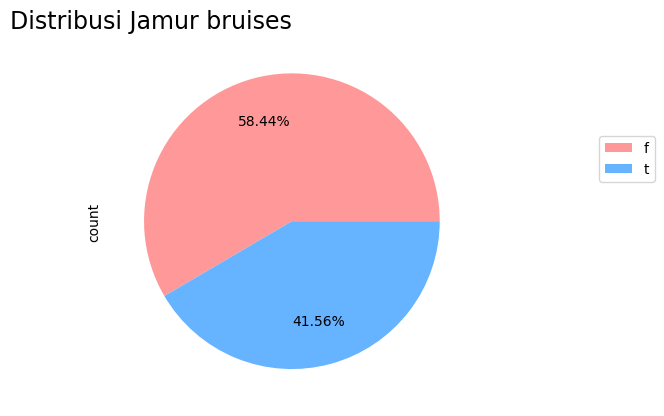

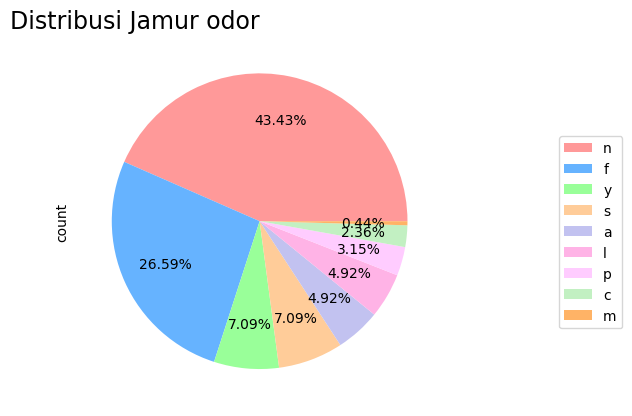

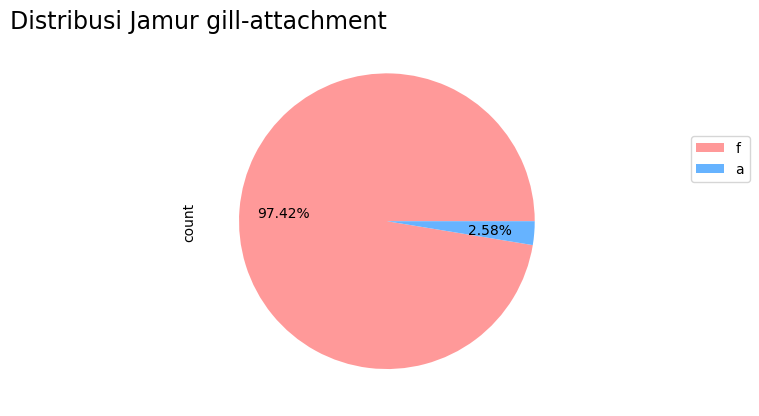

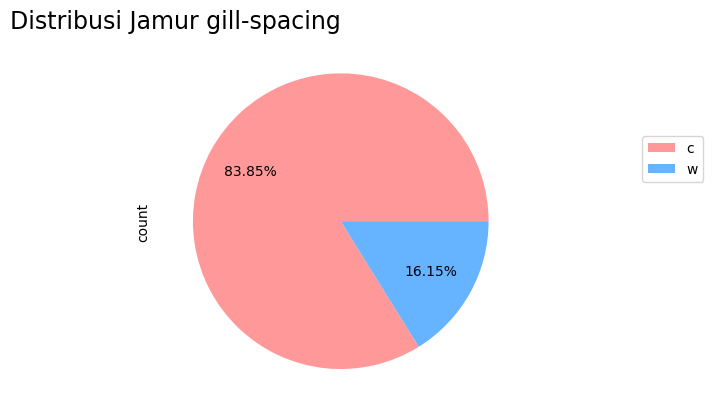

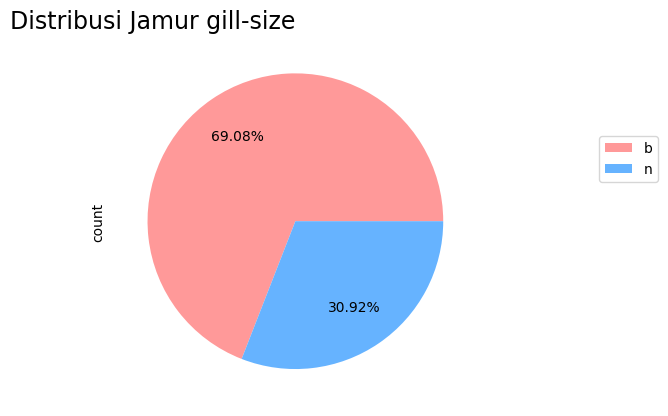

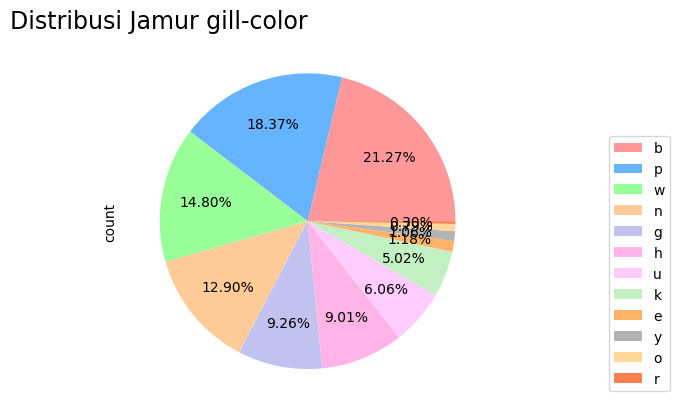

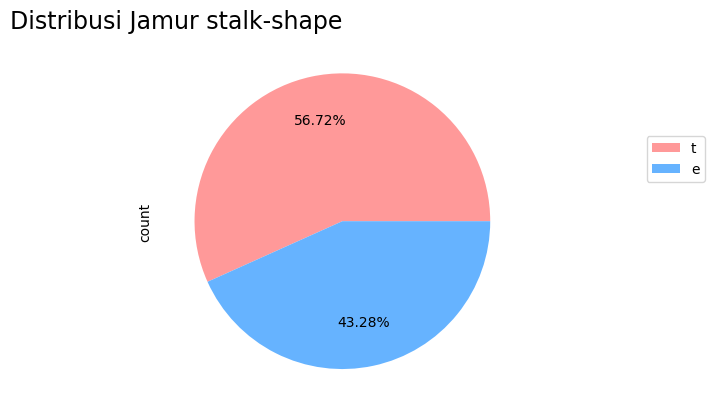

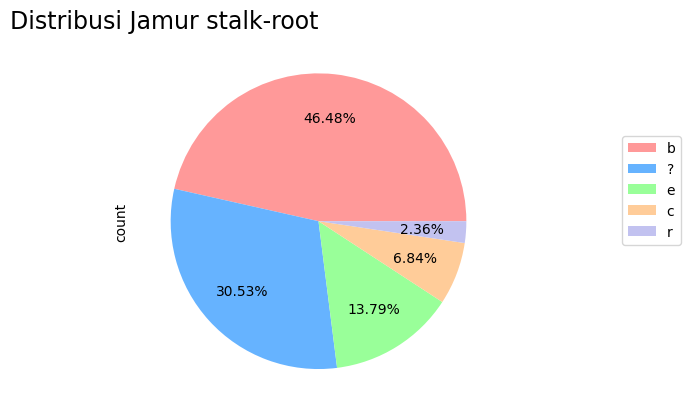

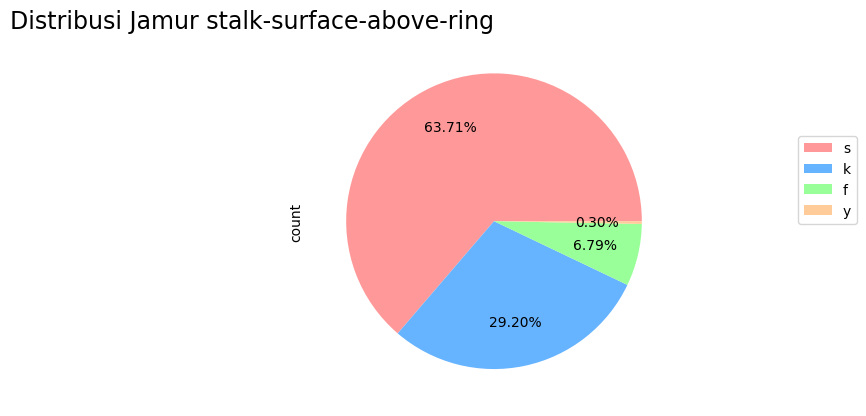

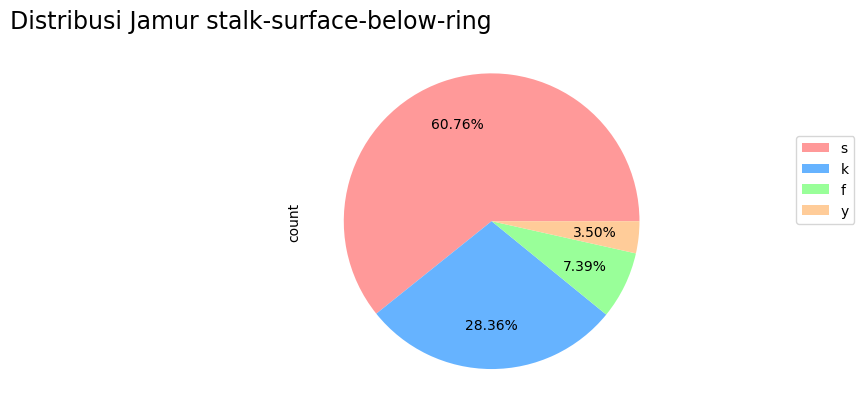

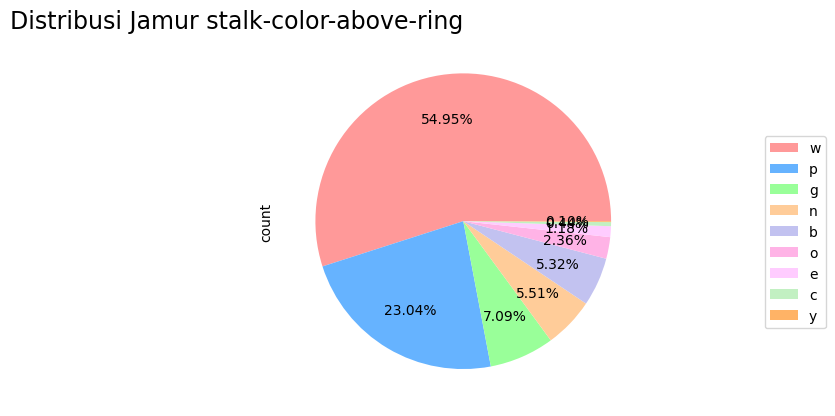

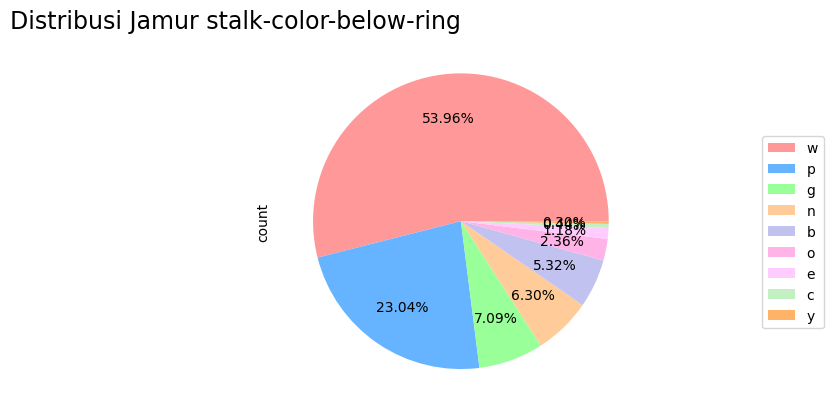

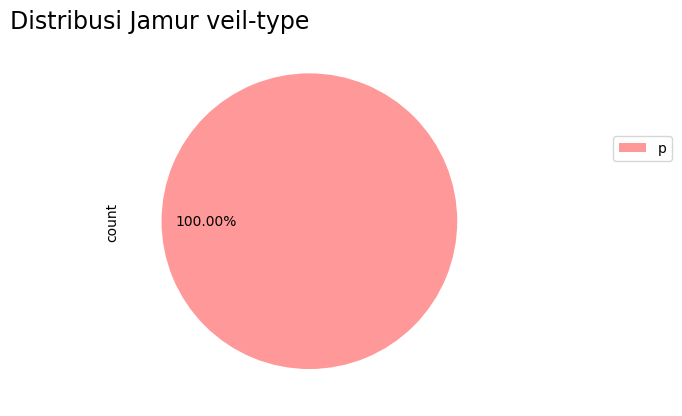

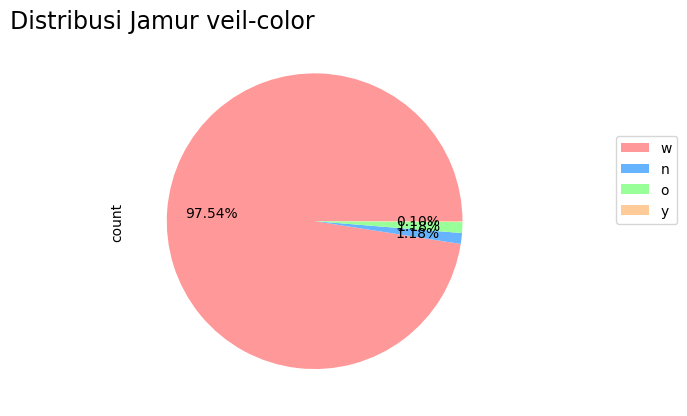

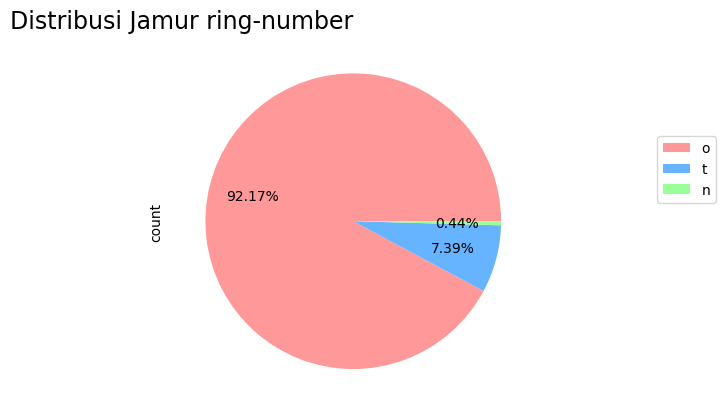

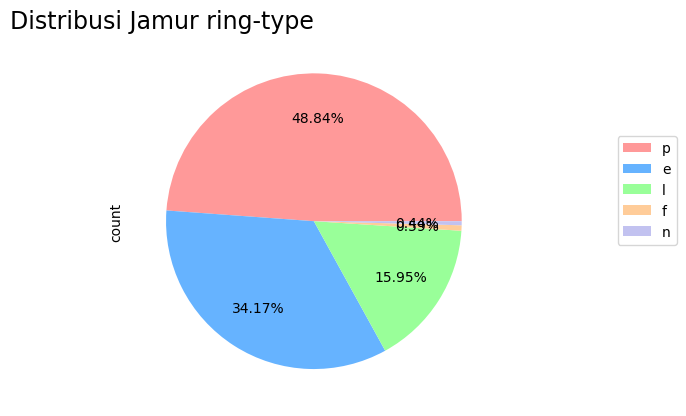

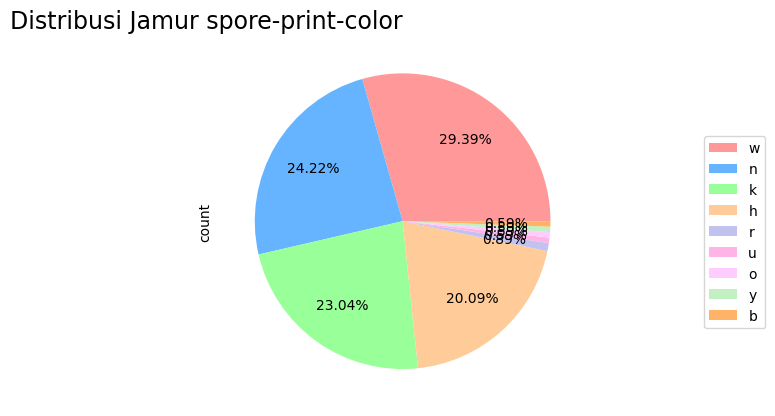

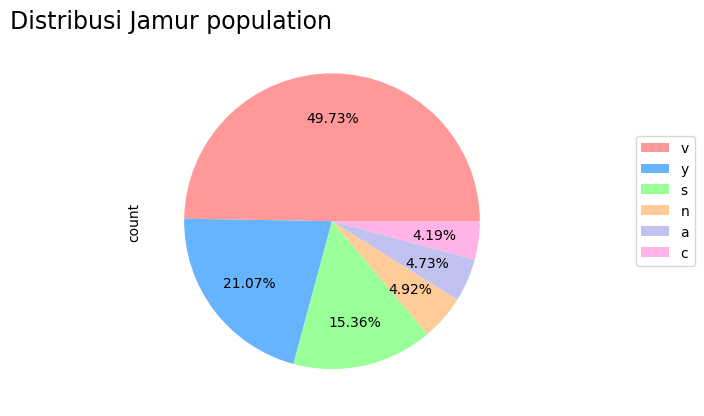

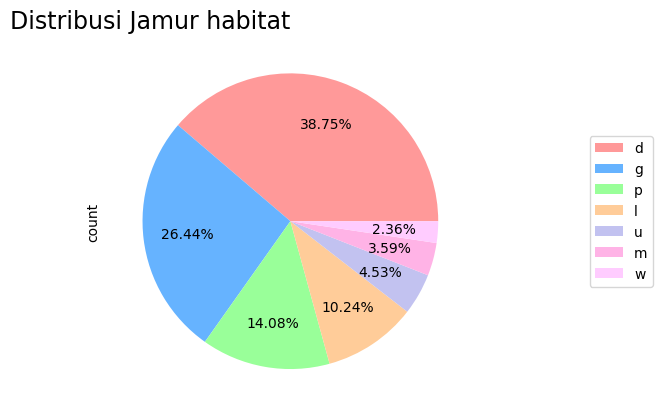

In [23]:
# Mendefinisikan daftar warna untuk pie chart yang lebih cerah
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', 
          '#ffb3e6', '#ffccff', '#c2f0c2', '#ffb366', '#b3b3b3', 
          '#ffd699', '#ff7f50', '#add8e6']

# Membuat pie chart untuk setiap kolom dalam DataFrame
for i in df.columns:
    plt.figure()  # Membuat figure baru untuk setiap pie chart
    df[i].value_counts().plot.pie(
        textprops={'color': "black"},  # Mengatur warna teks menjadi hitam untuk kontras yang lebih baik
        pctdistance=0.7,  # Mengatur jarak persentase dari pusat pie chart
        autopct='%.2f%%',  # Format tampilan persentase
        colors=colors,  # Menggunakan daftar warna yang telah didefinisikan
        figsize=(5, 5),  # Ukuran pie chart
        labels=None,  # Tidak menampilkan label di pie chart
        subplots=True  # Mengizinkan subplot untuk setiap kolom
    )
    plt.title("Distribusi Jamur {}".format(i), fontsize=17, ha='right')  # Menambahkan judul untuk pie chart
    plt.legend(labels=df[i].value_counts().index, loc="best", bbox_to_anchor=(1, 0.25, 0.5, 0.5))  # Menambahkan legenda
    plt.show()  # Menampilkan pie chart


Kita akan menyatakan :

e --> 1

p --> 0

# Data Preparation

In [12]:
# Mengganti nilai dalam kolom 'class' menggunakan .map()
df['class'] = df['class'].map({'e': 1, 'p': 0})

In [13]:
# Menampilkan dua baris pertama dari DataFrame untuk melihat struktur dan data
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [14]:
# Memisahkan fitur (X) dari DataFrame, mengambil semua kolom kecuali kolom pertama
X = df.iloc[:, 1:]

# Mengonversi kolom kategori menjadi variabel dummy (one-hot encoding), menghapus kolom pertama untuk menghindari multikolinearitas
X = pd.get_dummies(X, columns=X.columns, drop_first=True)

# Menampilkan dua baris pertama dari DataFrame fitur setelah one-hot encoding
X.head(2)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False


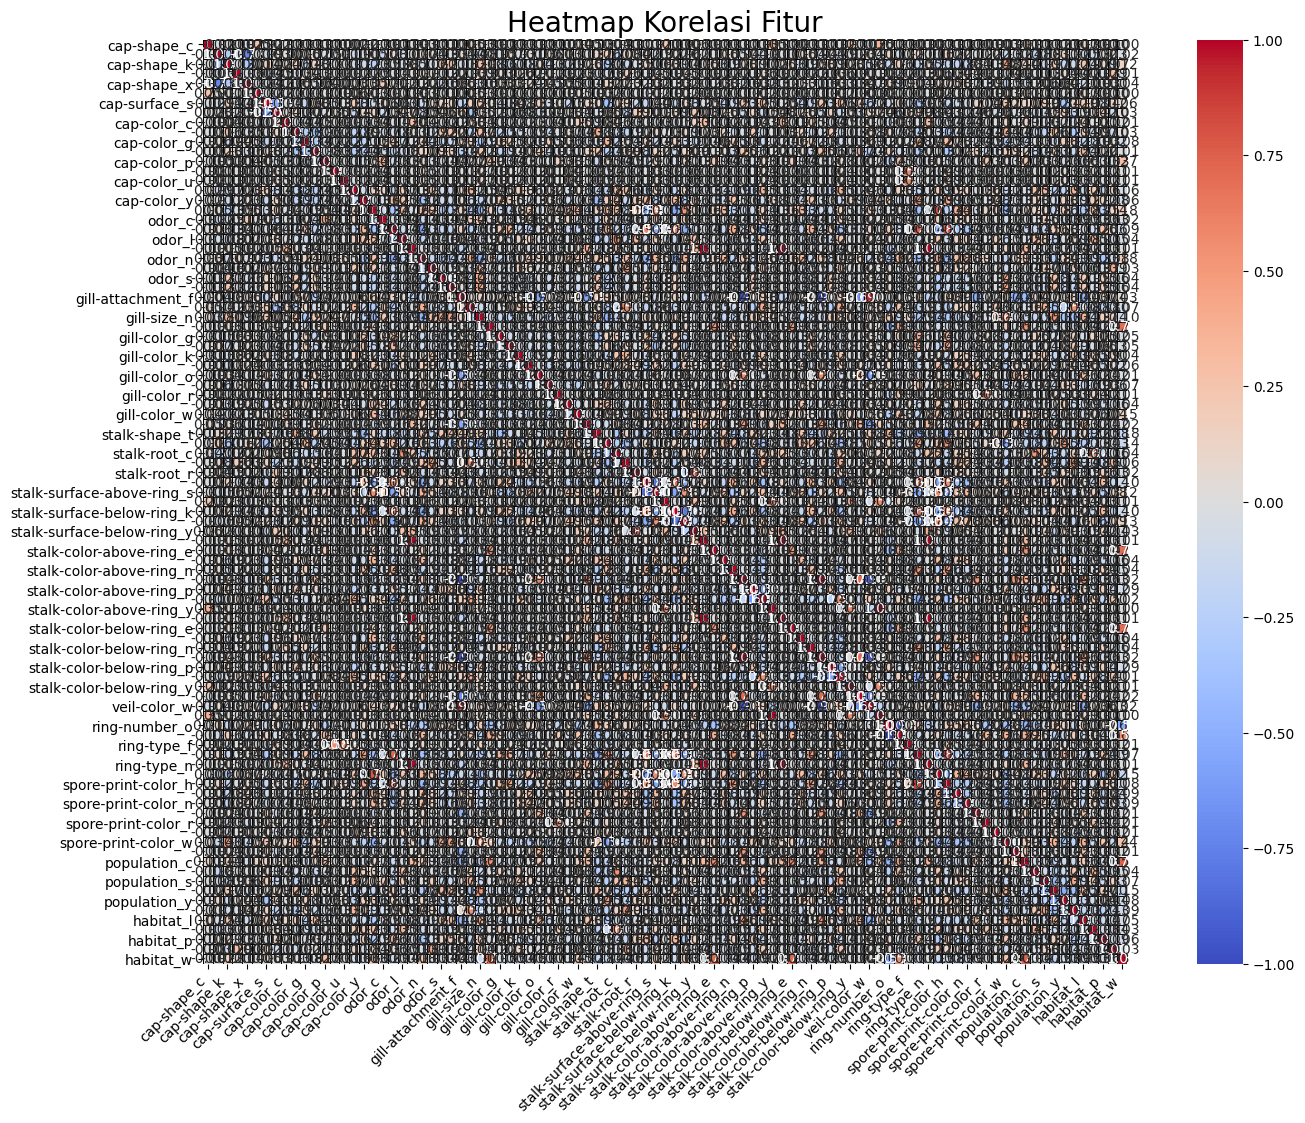

In [15]:
plt.subplots(figsize=(18, 12))  # Ukuran figure yang lebih kecil
corr = X.corr()  # Menghitung matriks korelasi

# Membuat heatmap dengan pengaturan berbeda
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',  # Mengubah palet warna
    square=True,
    annot=True,  # Menampilkan nilai korelasi di dalam sel
    fmt='.2f',  # Format angka
    linewidths=.5,  # Garis pemisah antara sel
    linecolor='black'  # Warna garis pemisah
)

# Mengatur label sumbu x
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Menambahkan judul untuk heatmap
plt.title('Heatmap Korelasi Fitur', fontsize=20)

# Menampilkan grafik
plt.show()


In [16]:
# Mengambil nilai dari kolom 'class' dan menyimpannya dalam variabel y sebagai array NumPy
y = df['class'].values

# Menampilkan nilai dari variabel y
y

array([0, 1, 1, ..., 1, 0, 1])

**Kita split dataset menjadi 2, data trining dan data test**

In [17]:
# Memisahkan dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Data Modelling

**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression  # Mengimpor model regresi logistik dari scikit-learn

# Membuat objek model regresi logistik
lrg = LogisticRegression()

# Melatih model menggunakan data pelatihan
lrg.fit(X_train, y_train)

# Memprediksi label menggunakan data pengujian
y_pred = lrg.predict(X_test)

# Menghitung dan mencetak akurasi model
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.9991796554552912


**Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier  # Mengimpor kelas RandomForestClassifier dari scikit-learn

# Membuat objek Random Forest Classifier dengan kedalaman maksimum 2 dan pengaturan acak tetap
rfc = RandomForestClassifier(max_depth=2, random_state=0)

# Melatih model menggunakan data pelatihan
rfc.fit(X_train, y_train)

# Memprediksi label menggunakan data pengujian
y_pred = rfc.predict(X_test)

# Menghitung dan mencetak akurasi model
print('Random Forest Classifier Accuracy:', accuracy_score(y_test, y_pred))

Random Forest Classifier Accuracy: 0.9265791632485644


**XGBoost**

In [22]:
from xgboost import XGBClassifier  # Mengimpor kelas XGBClassifier dari pustaka XGBoost

# Membuat objek XGBoost Classifier
xgb = XGBClassifier()

# Melatih model menggunakan data pelatihan
xgb.fit(X_train, y_train)

# Memprediksi label menggunakan data pengujian
y_xgb = xgb.predict(X_test)

# Menghitung dan mencetak akurasi model
print('XGBoost Accuracy:', accuracy_score(y_test, y_xgb))

XGBoost Accuracy: 1.0
